In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

there is no missing values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
print(f'Categories in gender : {df['gender'].unique()}')
print(f'Categories in race_ethnicity : {df['race_ethnicity'].unique()}')
print(f'Categories in parental_level_of_education : {df['parental_level_of_education'].unique()}')
print(f'Categories in lunch : {df['lunch'].unique()}')
print(f'Categories in test_preparation_course : {df['test_preparation_course'].unique()}')

Categories in gender : ['female' 'male']
Categories in race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch : ['standard' 'free/reduced']
Categories in test_preparation_course : ['none' 'completed']


In [9]:
df['gender'].dtype

dtype('O')

In [10]:
numerical_features = [feature  for feature in df.columns if df[feature].dtype !='O']
categorical_features  = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'Number of numerical feature is {len(numerical_features)} and those features are as such {numerical_features}')
print(f'Number of numerical feature is {len(categorical_features)} and those features are as such {categorical_features}')

Number of numerical feature is 3 and those features are as such ['math_score', 'reading_score', 'writing_score']
Number of numerical feature is 5 and those features are as such ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# Adding totala and average score 

In [5]:
df['total_score'] = df['writing_score']+df['math_score']+df['reading_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
print(f'''Number of student with math score 100{df[df['math_score']==100]['average'].count()} 
Number of student with writing score 100 {df[df['writing_score']==100]['average'].count()} 
Number of student with reading score 100 {df[df['reading_score']==100]['average'].count()}''')

Number of student with math score 1007 
Number of student with writing score 100 14 
Number of student with reading score 100 17


In [13]:
print(f'''{df[df['math_score']<20]['average'].count()}
{df[df['writing_score']<20]['average'].count()}
{df[df['reading_score']<20]['average'].count()}''')

4
3
1


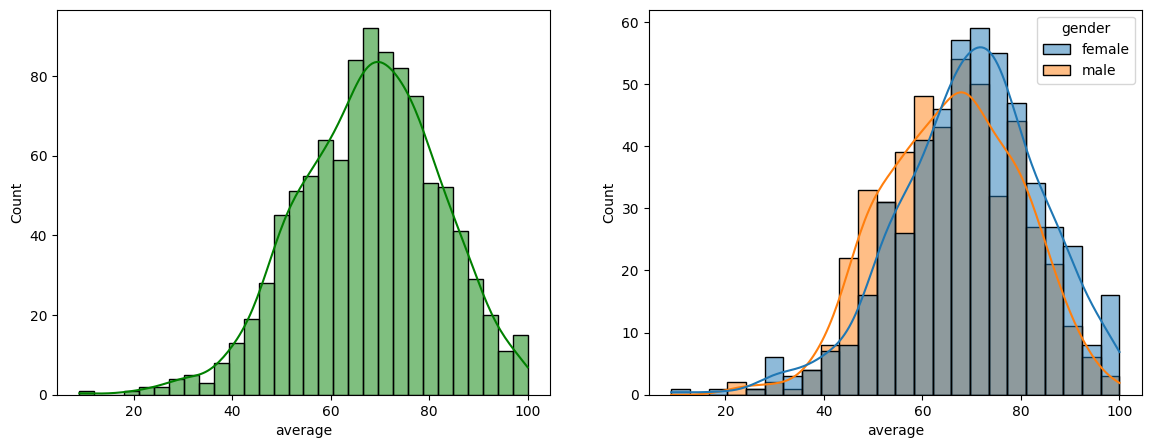

In [43]:
fig,axs = plt.subplots(1,2,figsize = (14,5))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

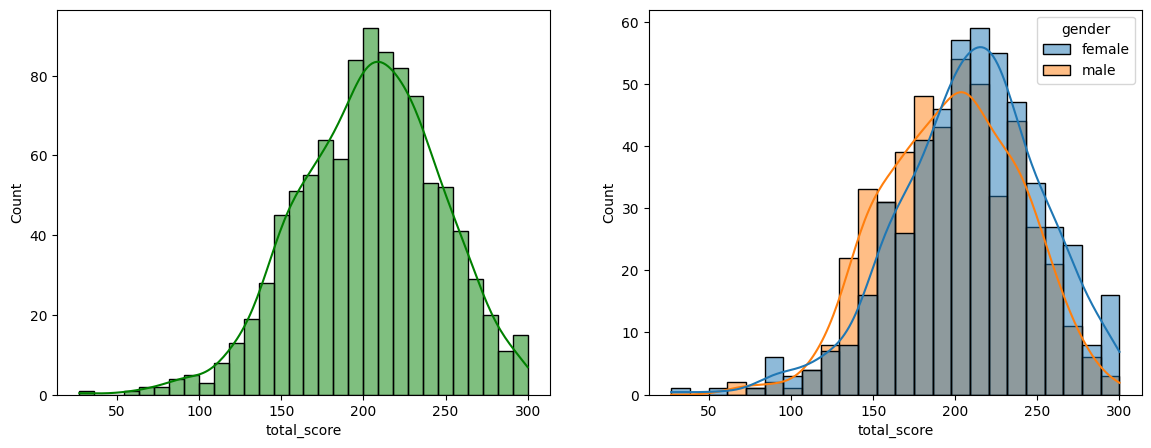

In [48]:
fig,axs = plt.subplots(1,2,figsize = (14,5))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

##### Female students do better than male students

<Axes: xlabel='average', ylabel='Count'>

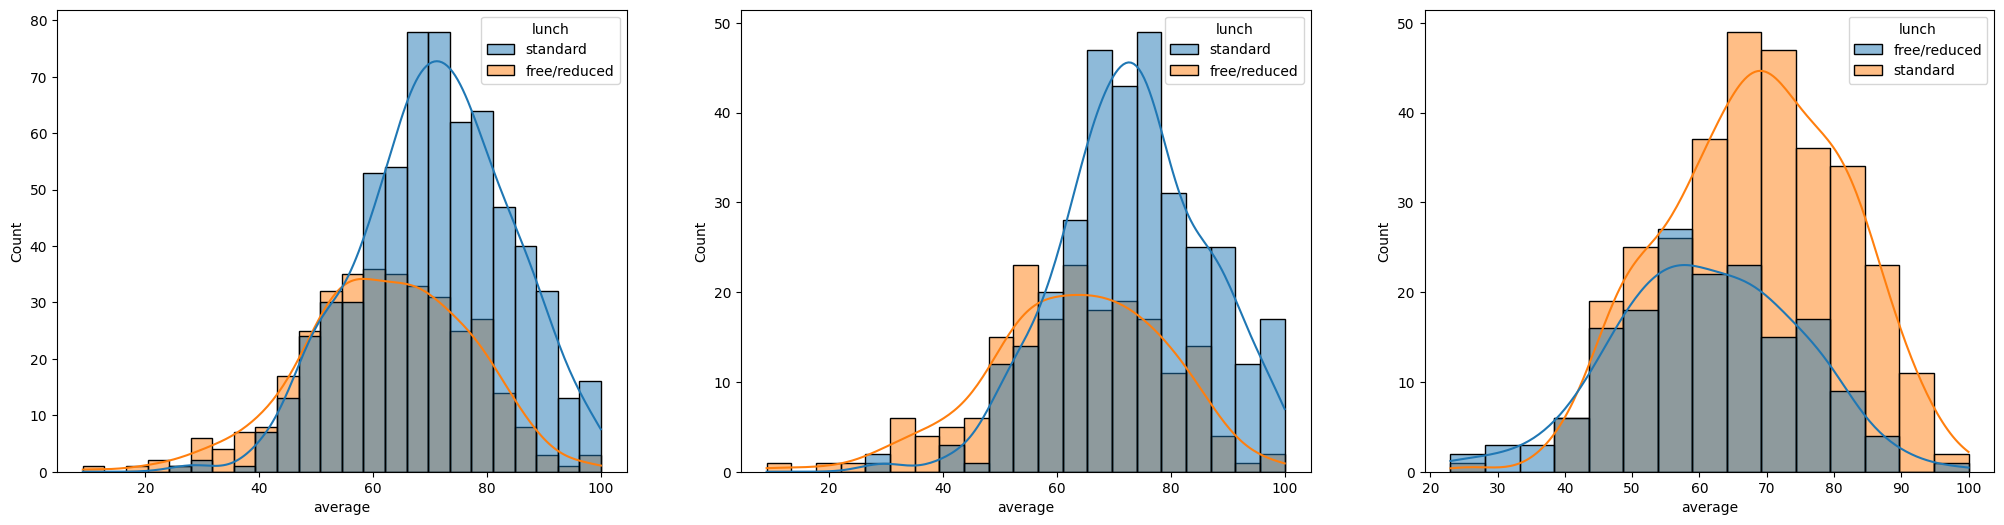

In [51]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='lunch')


Insights
Standard lunch helps perform well in exams.
Standard lunch helps perform well in exams be it a male or a female.

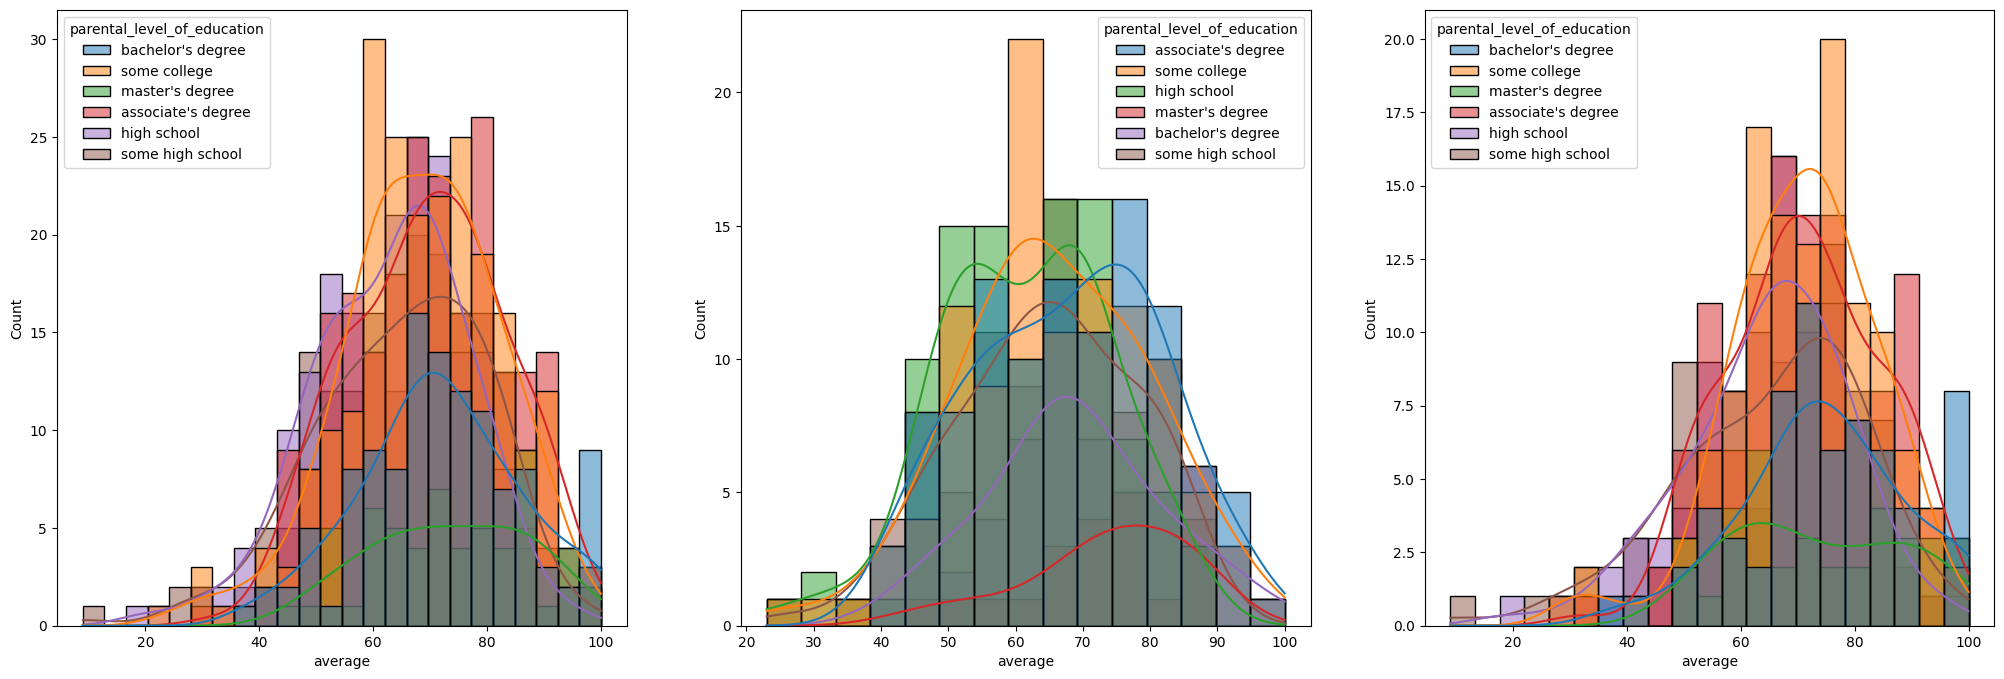

In [54]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

Insights
1) In general parent's education don't help student perform well in exam.
2) 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3) 3rd plot we can see there is no effect of parent's education on female students.

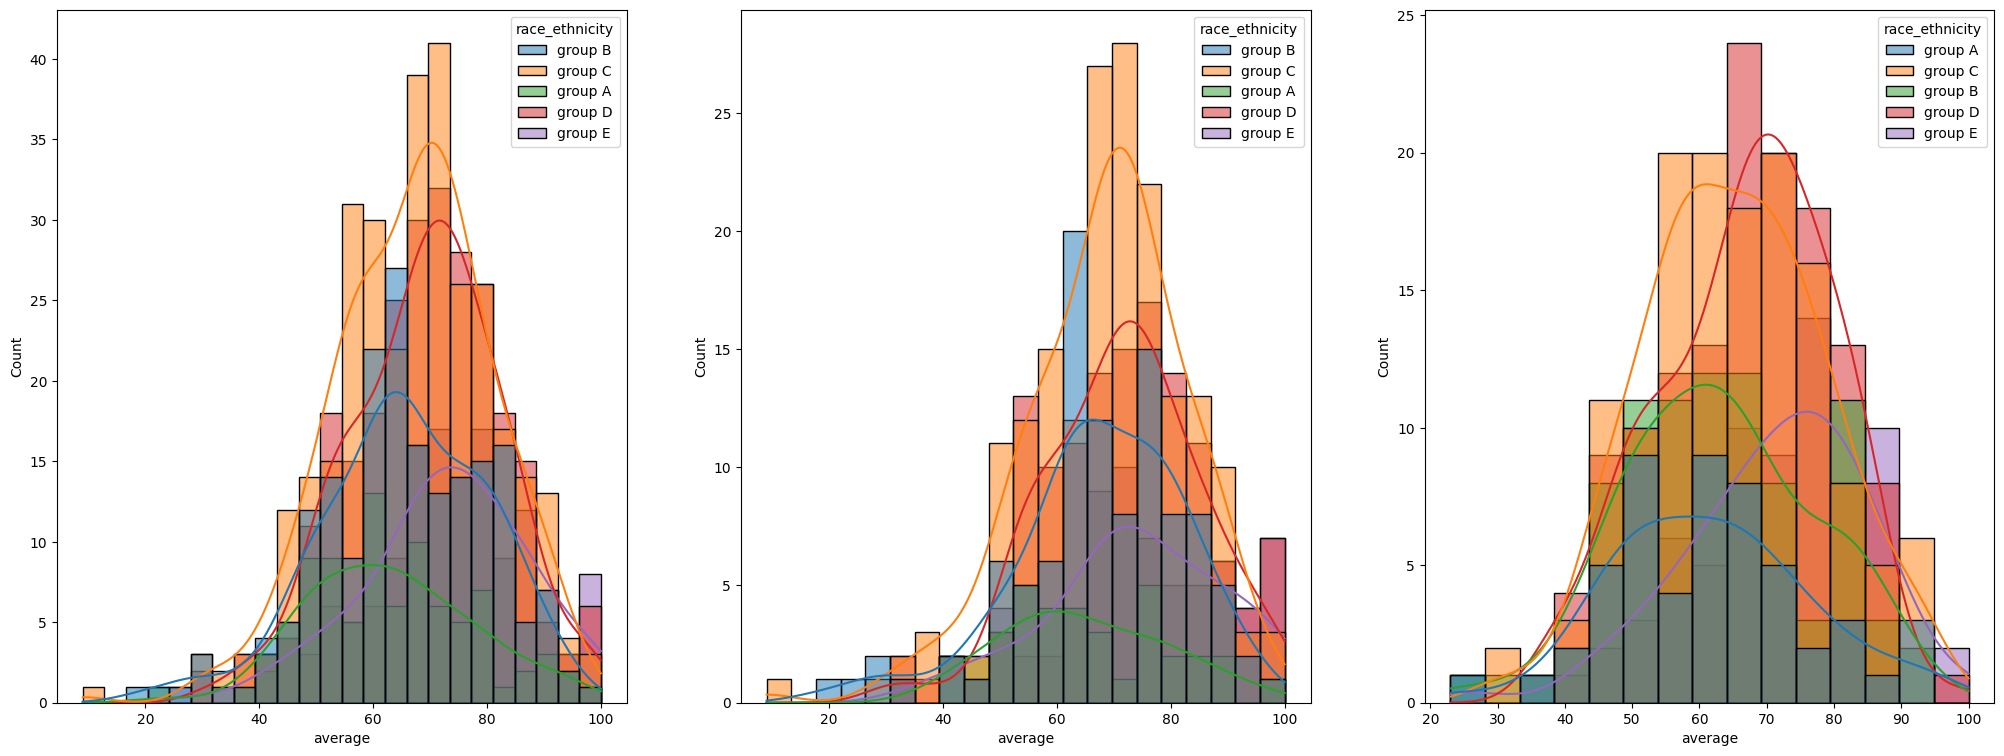

In [57]:
plt.subplots(1,3,figsize=(25,9))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Insights
1) Students of group A and group B tends to perform poorly in exam.
2) Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

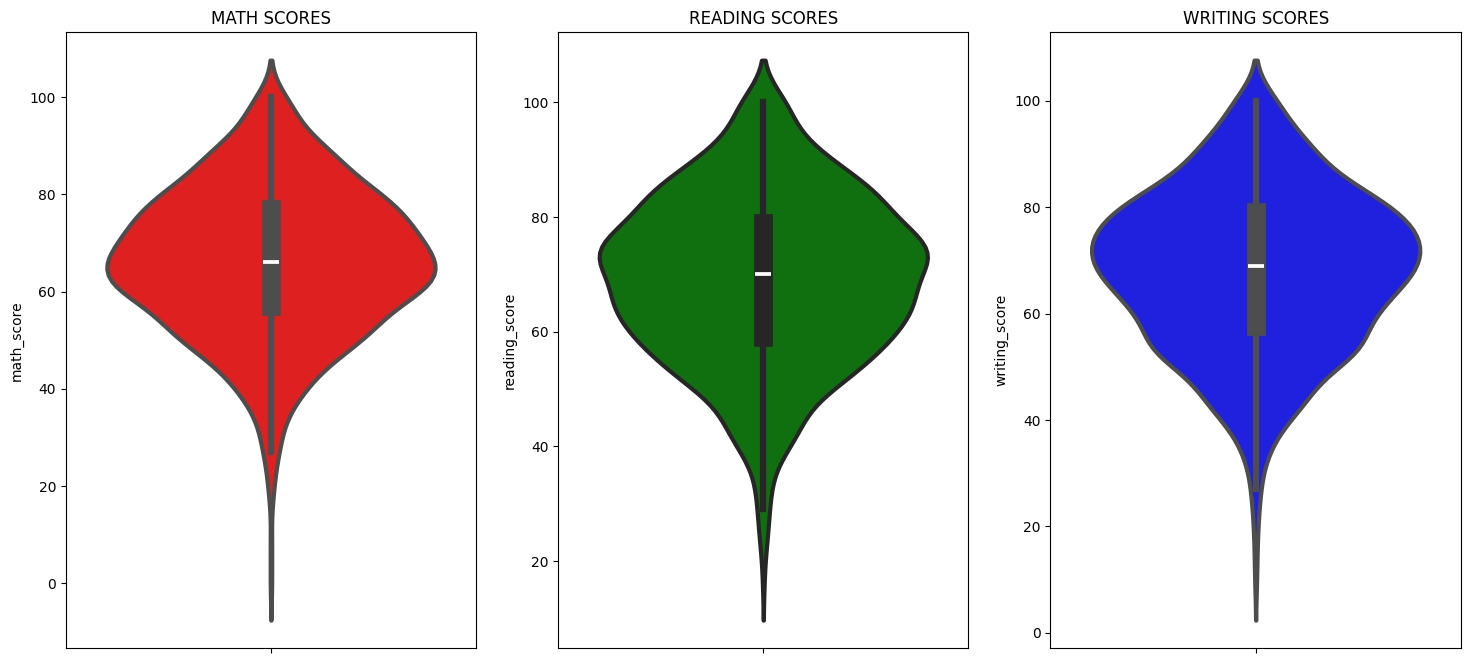

In [59]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights
1: From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

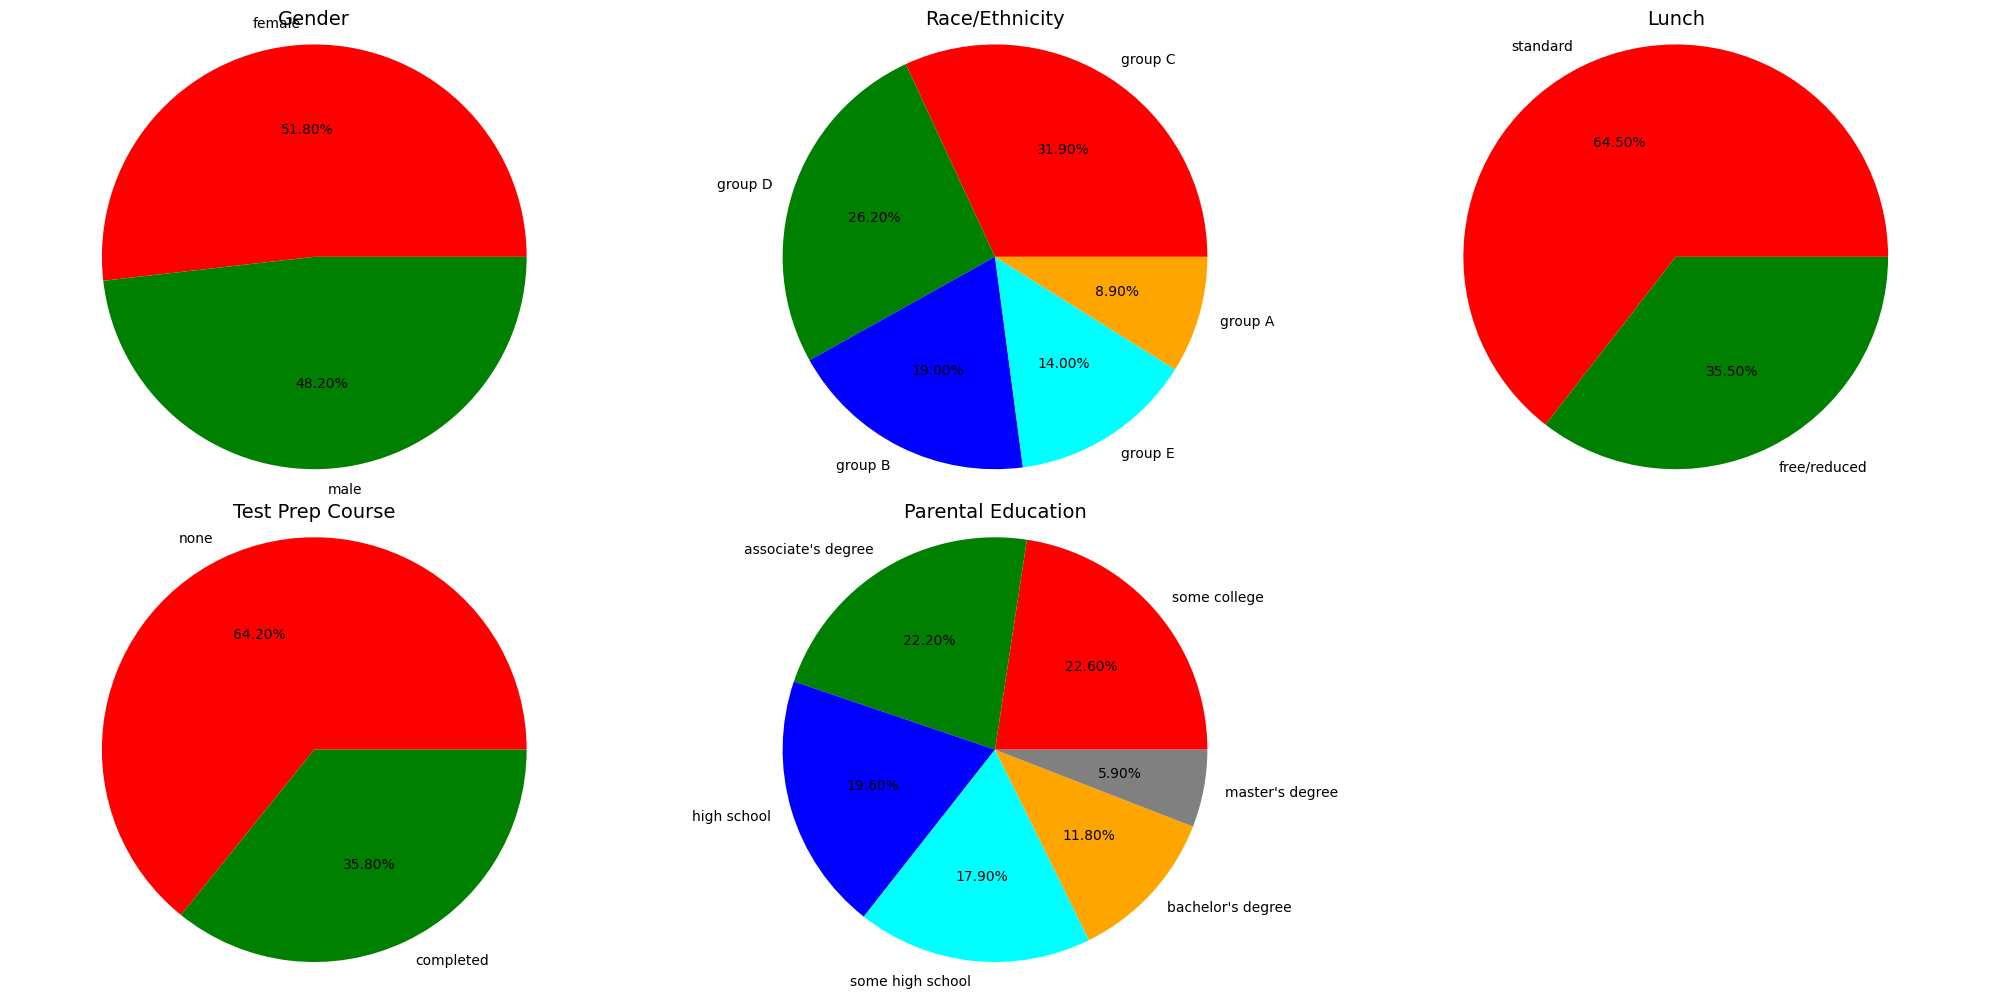

In [17]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))  # 2 rows, 3 columns
axs = axs.flatten()  # Flatten 2D axes array to 1D for easy indexing

# Pie 1 - Gender
size = df['gender'].value_counts()
labels = size.index.tolist()
colors = ['red', 'green']
axs[0].pie(size, colors=colors[:len(size)], labels=labels, autopct='%.2f%%')
axs[0].set_title('Gender', fontsize=14)
axs[0].axis('equal')  # Keep pie aspect ratio

# Pie 2 - Race/Ethnicity
size = df['race_ethnicity'].value_counts()
labels = size.index.tolist()
colors = ['red', 'green', 'blue', 'cyan', 'orange']
axs[1].pie(size, colors=colors[:len(size)], labels=labels, autopct='%.2f%%')
axs[1].set_title('Race/Ethnicity', fontsize=14)
axs[1].axis('equal')

# Pie 3 - Lunch
size = df['lunch'].value_counts()
labels = size.index.tolist()
colors = ['red', 'green']
axs[2].pie(size, colors=colors[:len(size)], labels=labels, autopct='%.2f%%')
axs[2].set_title('Lunch', fontsize=14)
axs[2].axis('equal')

# Pie 4 - Test Preparation Course
size = df['test_preparation_course'].value_counts()
labels = size.index.tolist()
colors = ['red', 'green']
axs[3].pie(size, colors=colors[:len(size)], labels=labels, autopct='%.2f%%')
axs[3].set_title('Test Prep Course', fontsize=14)
axs[3].axis('equal')

# Pie 5 - Parental Level of Education
size = df['parental_level_of_education'].value_counts()
labels = size.index.tolist()
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
axs[4].pie(size, colors=colors[:len(size)], labels=labels, autopct='%.2f%%')
axs[4].set_title('Parental Education', fontsize=14)
axs[4].axis('equal')

# Hide the 6th subplot (unused)
axs[5].axis('off')

plt.tight_layout()
plt.show()

Insights
1) Number of Male and Female students is almost equal.
2) Number students are greatest in Group C
3) Number of students who have standard lunch are greater
4) Number of students who have not enrolled in any test preparation course is greater
5) Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

C:\Users\Hp\AppData\Local\Temp\ipykernel_7500\1720327845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


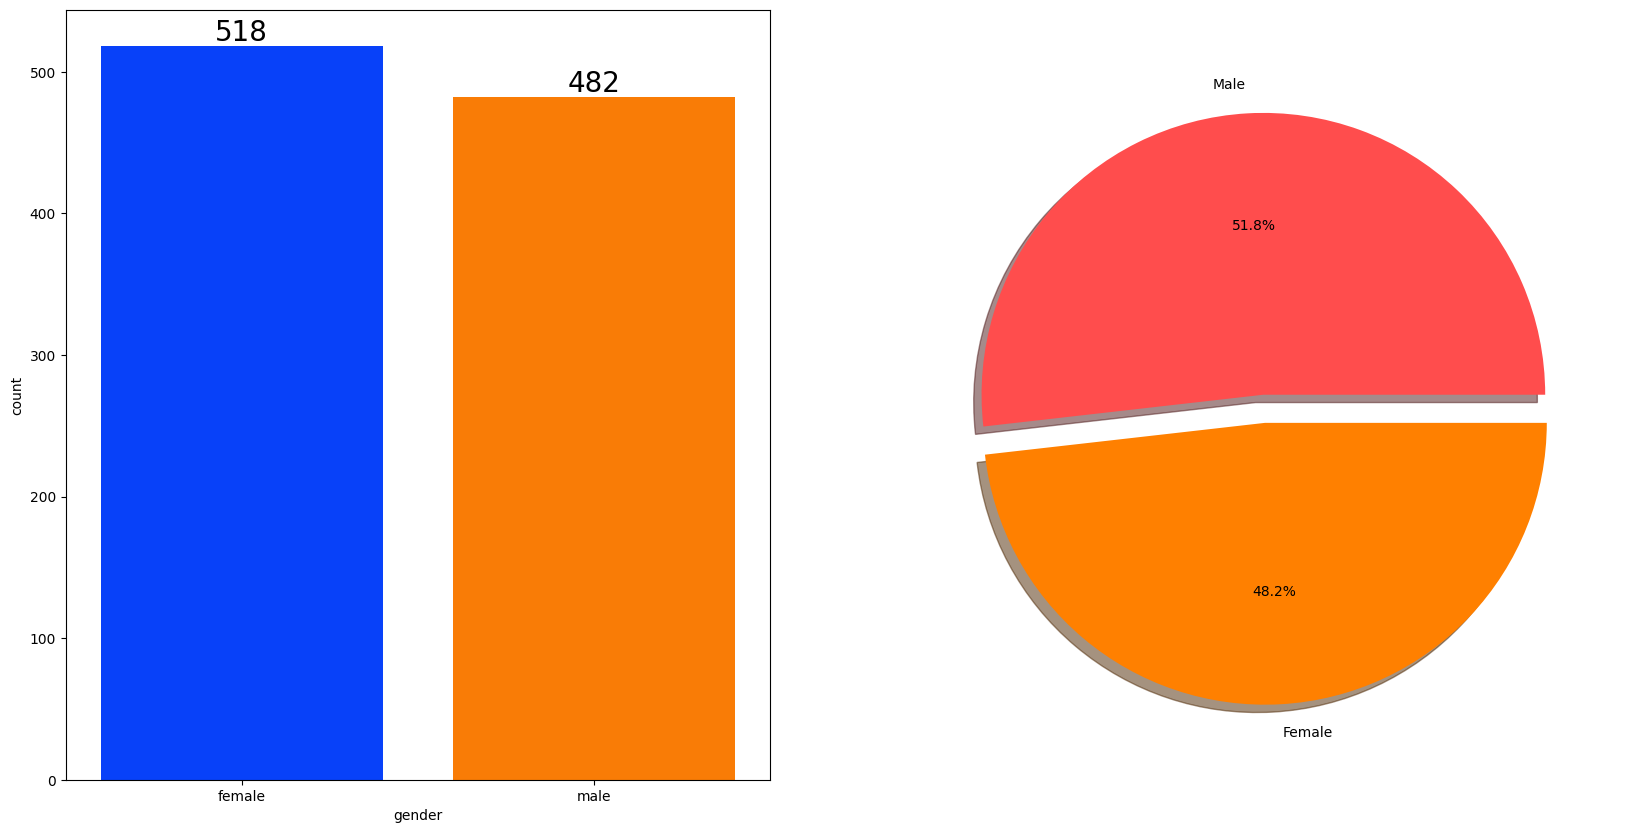

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights
Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [26]:
gender_group = df.groupby('gender').mean(numeric_only=True)

In [30]:
[gender_group.loc['male','math_score'],gender_group.loc['male','average']]

[np.float64(68.72821576763485), np.float64(65.8374827109267)]

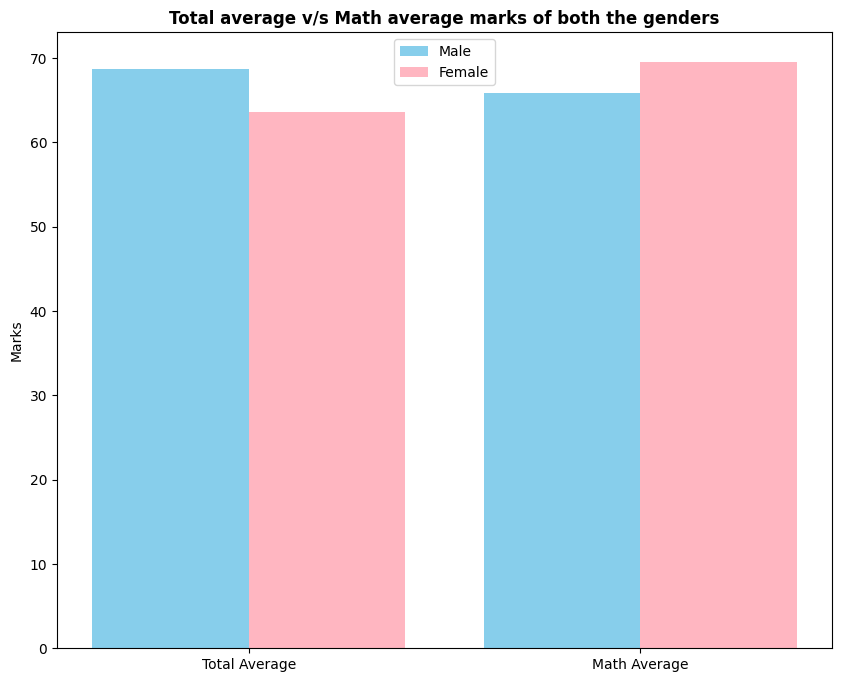

In [33]:
#BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']

female_scores = [gender_group.loc['female','math_score'],gender_group.loc['female','average']]
male_scores = [gender_group.loc['male','math_score'],gender_group.loc['male','average']]

X_axis = np.arange(len(X))
bar_width=0.4
# Bars
plt.bar(X_axis - bar_width/2, male_scores, width=bar_width, label='Male', color='skyblue')
plt.bar(X_axis + bar_width/2, female_scores, width=bar_width, label='Female', color='lightpink')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_7508\2026720508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['race_ethnicity'],palette='bright',ax=ax[0],saturation=0.95)


([<matplotlib.patches.Wedge at 0x2a34d066fd0>,
 [Text(0.6461720141062023, 1.0111684964366394, 'group B'),
  Text(-1.0461621541481756, 0.33991873621212615, 'group C'),
  Text(-0.49322161839826323, -0.9832255260847321, 'group A'),
  Text(0.5952332509117034, -0.9250391218803047, 'group D'),
  Text(1.0572819245745813, -0.30357030811307883, 'group E')],
 [Text(0.3769336748952847, 0.5898482895880396, '31.9%'),
  Text(-0.5706339022626412, 0.1854102197520688, '26.2%'),
  Text(-0.2690299736717799, -0.5363048324098538, '19.0%'),
  Text(0.3246726823154745, -0.5045667937528934, '14.0%'),
  Text(0.5766992315861351, -0.16558380442531573, '8.9%')])

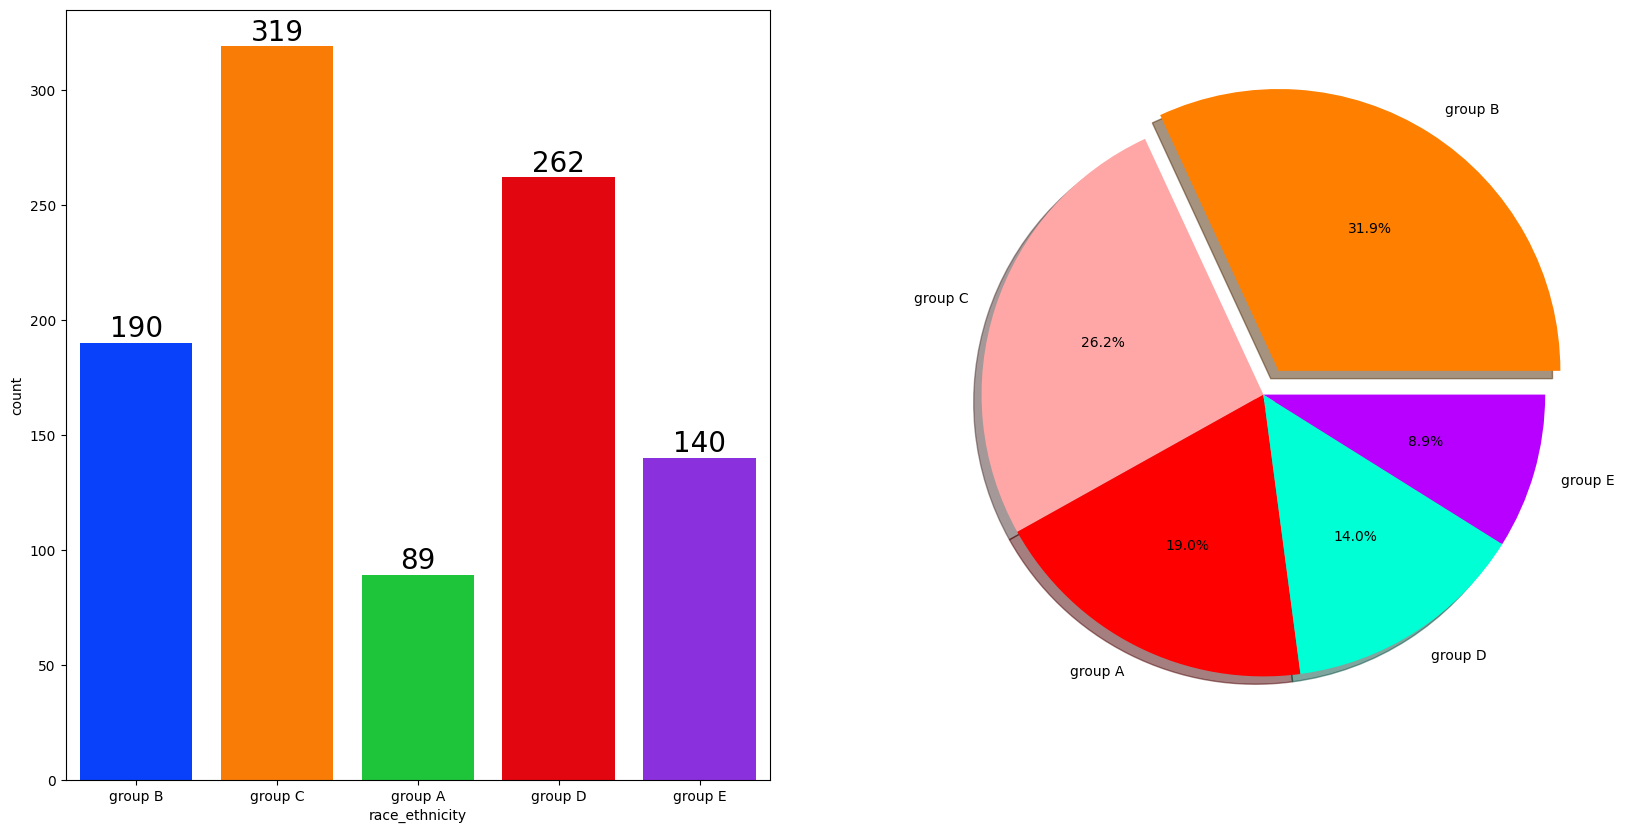

In [16]:
# UNIVARIATE ANALYSIS ( How is Group wise distribution ?
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=df,x=df['race_ethnicity'],palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=['group B', 'group C', 'group A', 'group D', 'group E'],colors=['#ff8000',"#FFA7A7","#ff0000","#00ffd5ff","#b700ff"],explode=[0.1,0,0,0,0],shadow=True,autopct="%1.1f%%")

Insights
1) Most of the student belonging from group C /group D.
2) Lowest number of students belong to groupA.

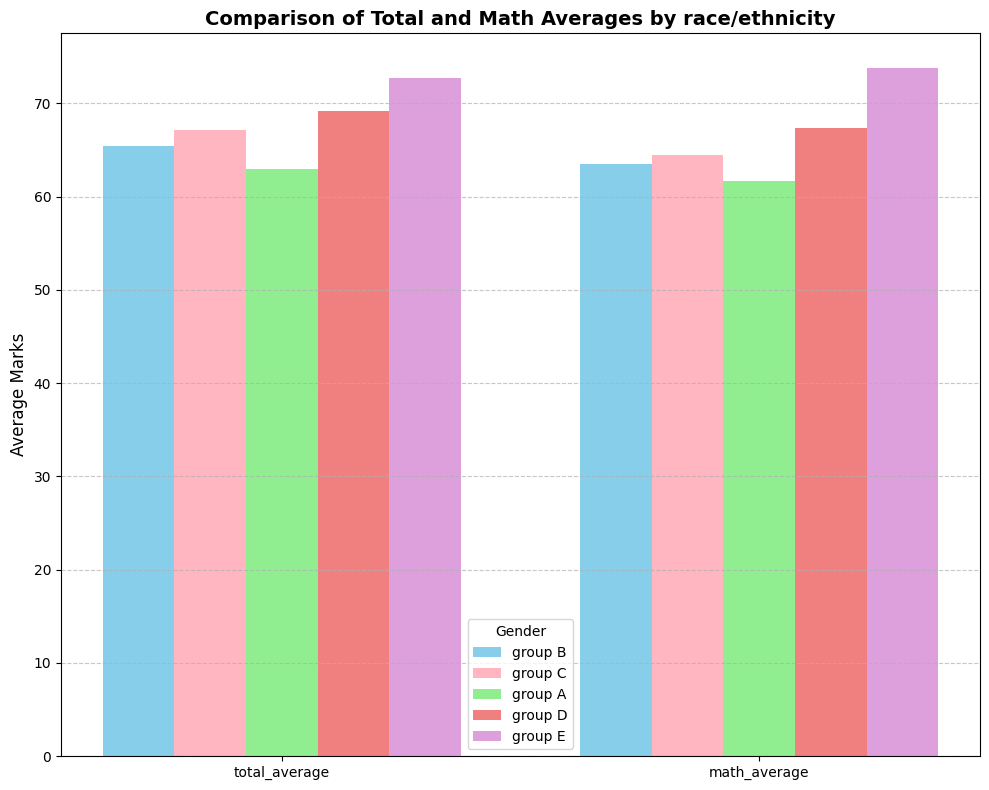

In [47]:
# BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )
race_grouped = df.groupby('race_ethnicity').mean(numeric_only=True)
plt.figure(figsize=(10, 8))
x_labels = ['total_average', 'math_average']
X_axis = np.arange(len(x_labels))
scores  = {
'group A' : [race_grouped.loc['group A','average'],race_grouped.loc['group A','math_score']],
'group B' : [race_grouped.loc['group B','average'],race_grouped.loc['group B','math_score']],
'group C' : [race_grouped.loc['group C','average'],race_grouped.loc['group C','math_score']],
'group D' : [race_grouped.loc['group D','average'],race_grouped.loc['group D','math_score']],
'group E' : [race_grouped.loc['group E','average'],race_grouped.loc['group E','math_score']]
}

colors = ['skyblue', 'lightpink', 'lightgreen', 'lightcoral', 'plum']
groups  = ['group B', 'group C', 'group A', 'group D', 'group E']
bar_width = 0.15

# Draw bars for each gender
for i, gender in enumerate(groups):
    offset = (i - 2) * bar_width  # centers the bars
    plt.bar(X_axis + offset, scores[gender], width=bar_width, label=gender, color=colors[i])

# Final touches
plt.xticks(X_axis, x_labels)
plt.ylabel("Average Marks", fontsize=12)
plt.title("Comparison of Total and Math Averages by race/ethnicity", fontsize=14, fontweight='bold')
plt.legend(title="Gender")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_7508\711199397.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['parental_level_of_education'], palette = 'coolwarm')


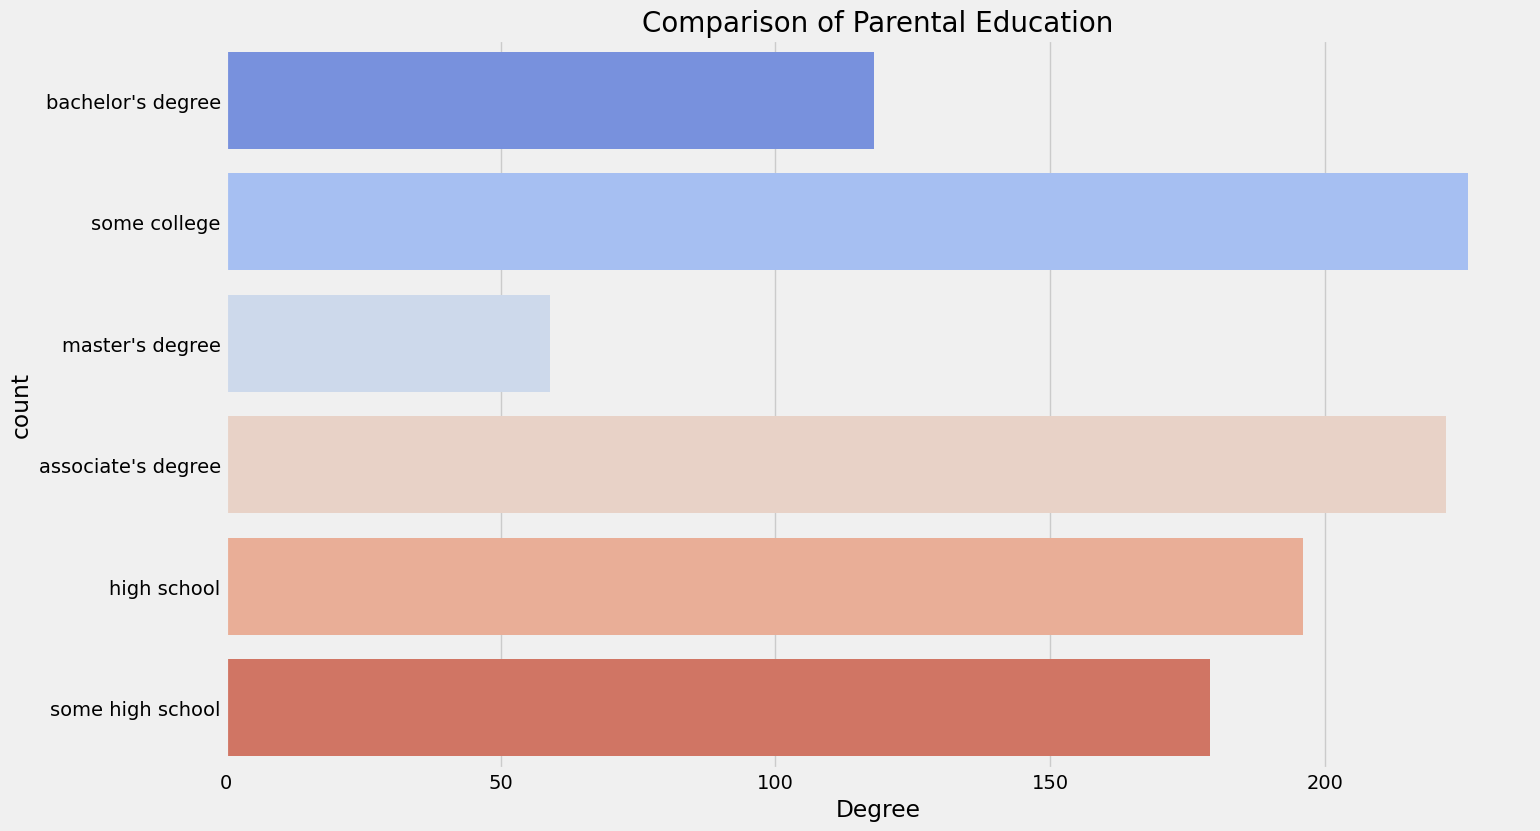

In [55]:
# UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'coolwarm')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights
Largest number of parents are from some college.

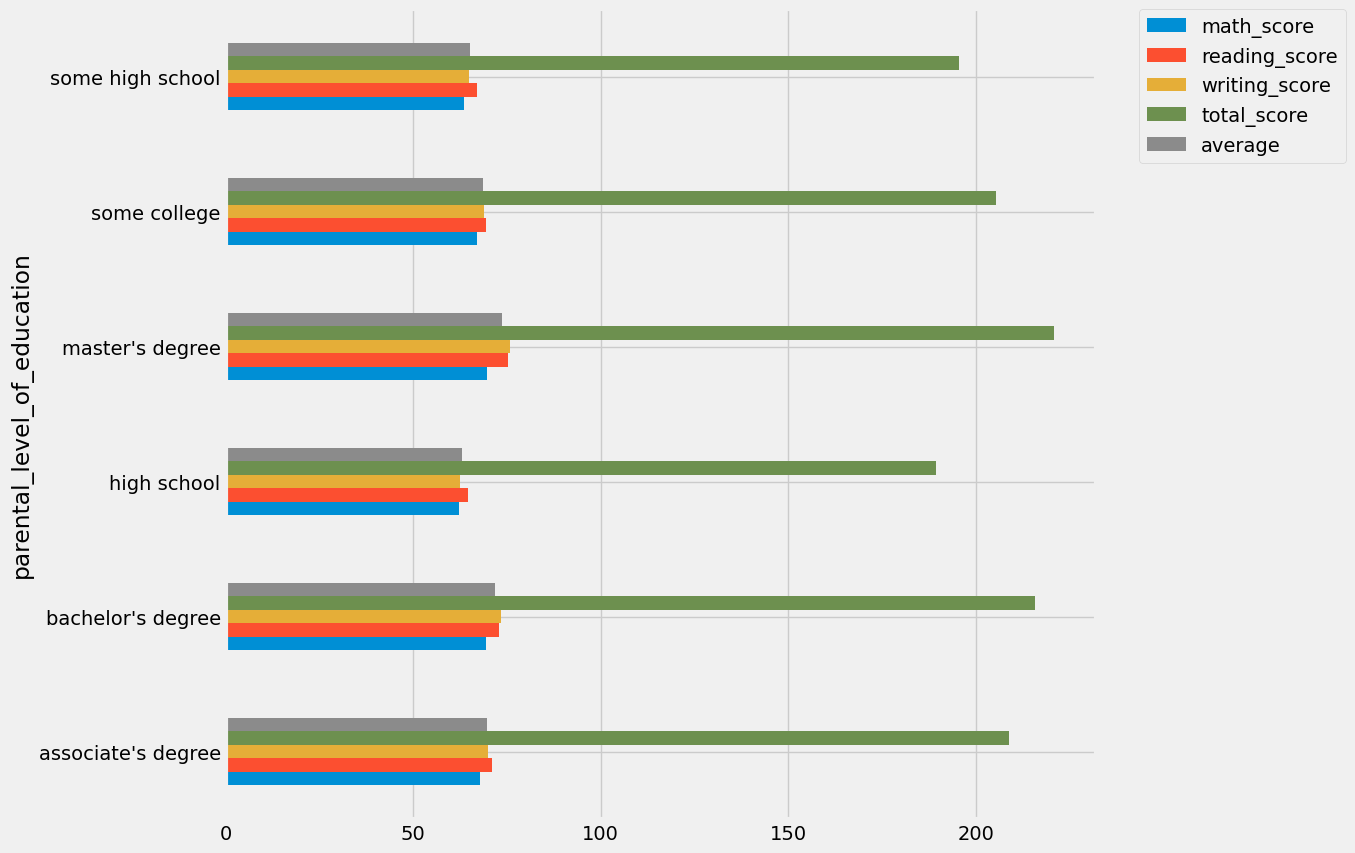

In [ ]:
# BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )
# Assuming you want to plot the mean of all numeric columns
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insights
The score of student whose parents possess master and bachelor level education are higher than others.

C:\Users\Hp\AppData\Local\Temp\ipykernel_7508\59888320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['lunch'], palette = 'PuBu',saturation=1)


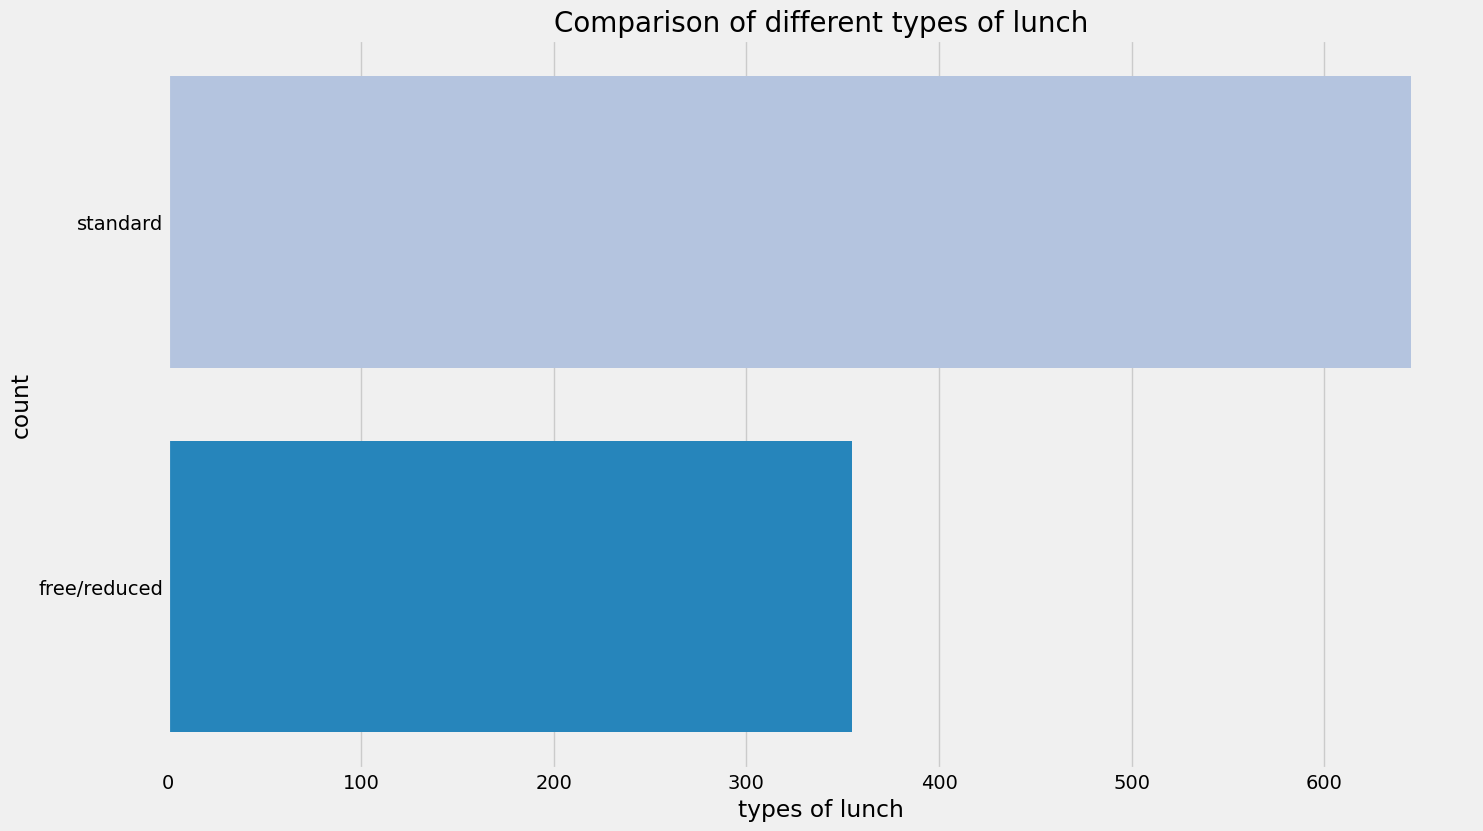

In [72]:
# UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ?
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'], palette = 'PuBu',saturation=1)
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insights
Students being served Standard lunch was more than free lunch

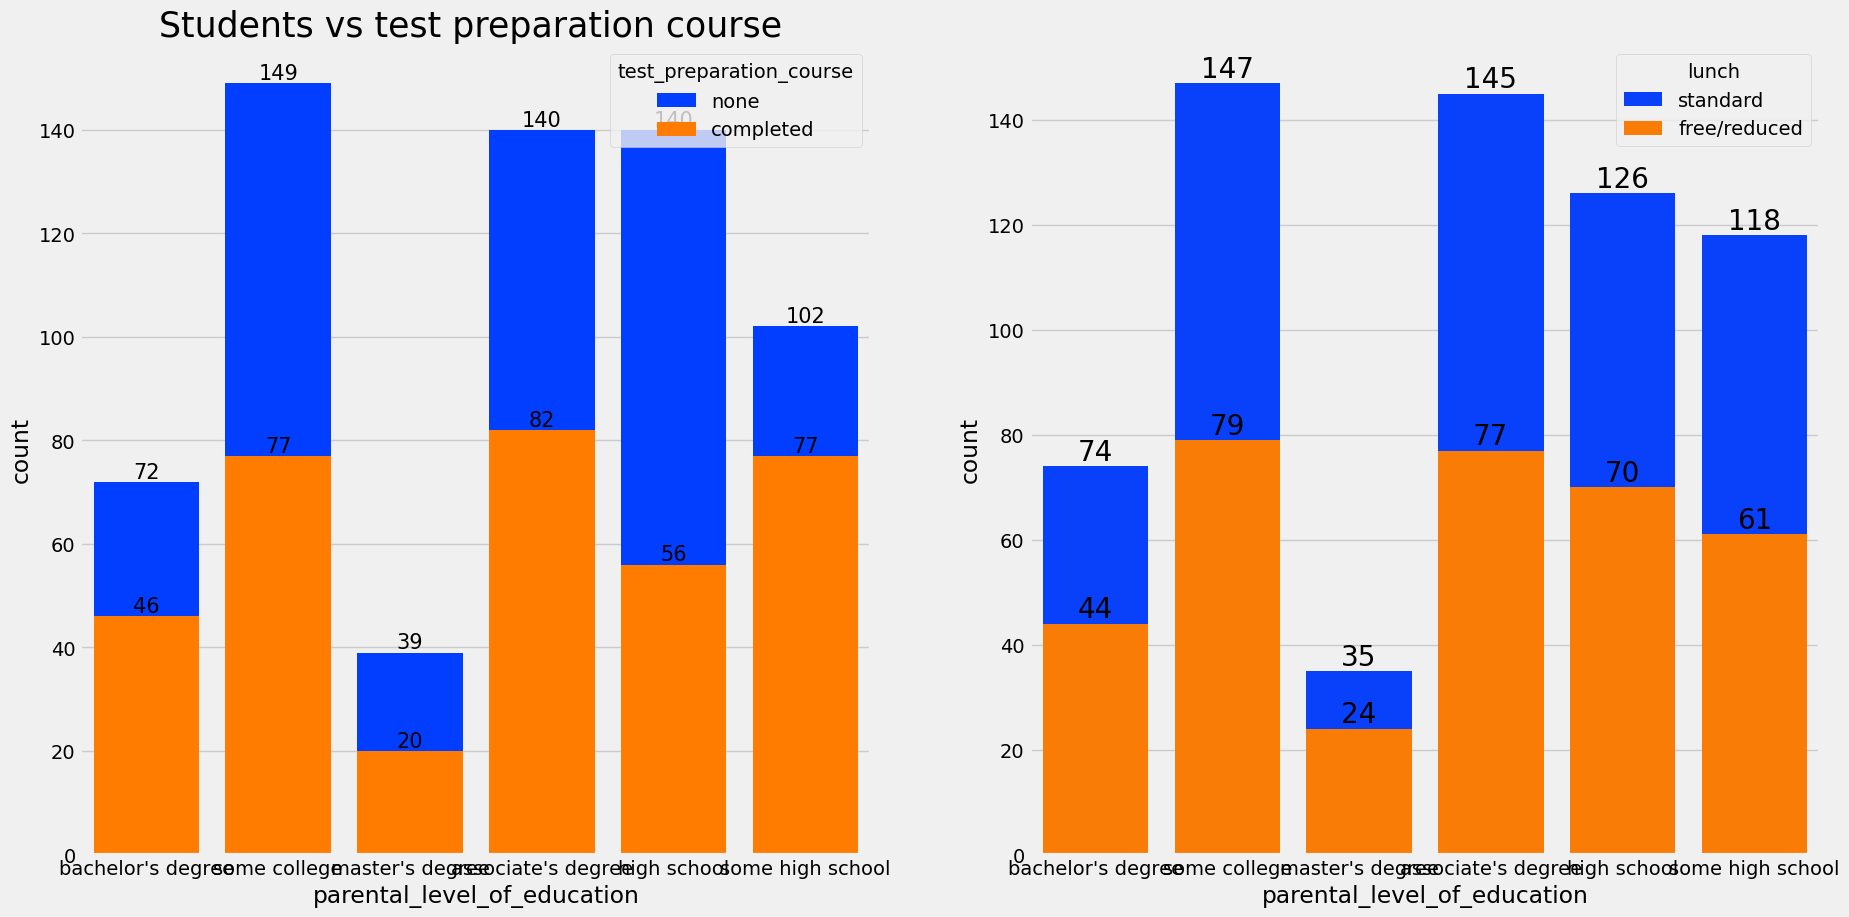

In [82]:
# BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=1,ax=ax[0],dodge=False)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
ax[0].set_title('Students vs test preparation course ',color='black',size=25)

sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1],dodge=False)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

Insights
Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

<Axes: xlabel='lunch', ylabel='writing_score'>

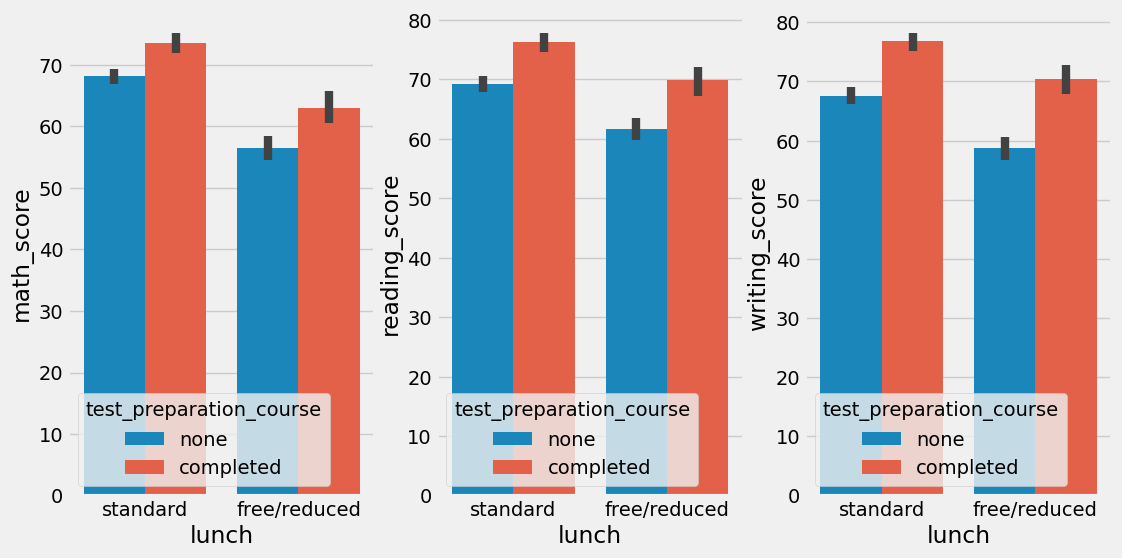

In [89]:
# BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )
plt.subplots(1,3,figsize=(12,6))
plt.subplot(1,3,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

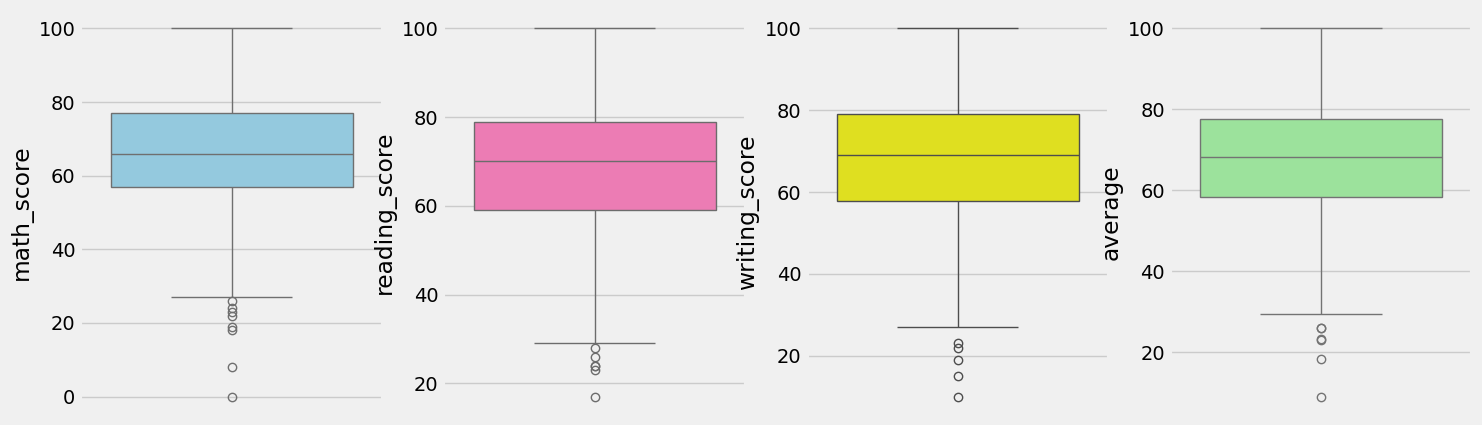

In [91]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

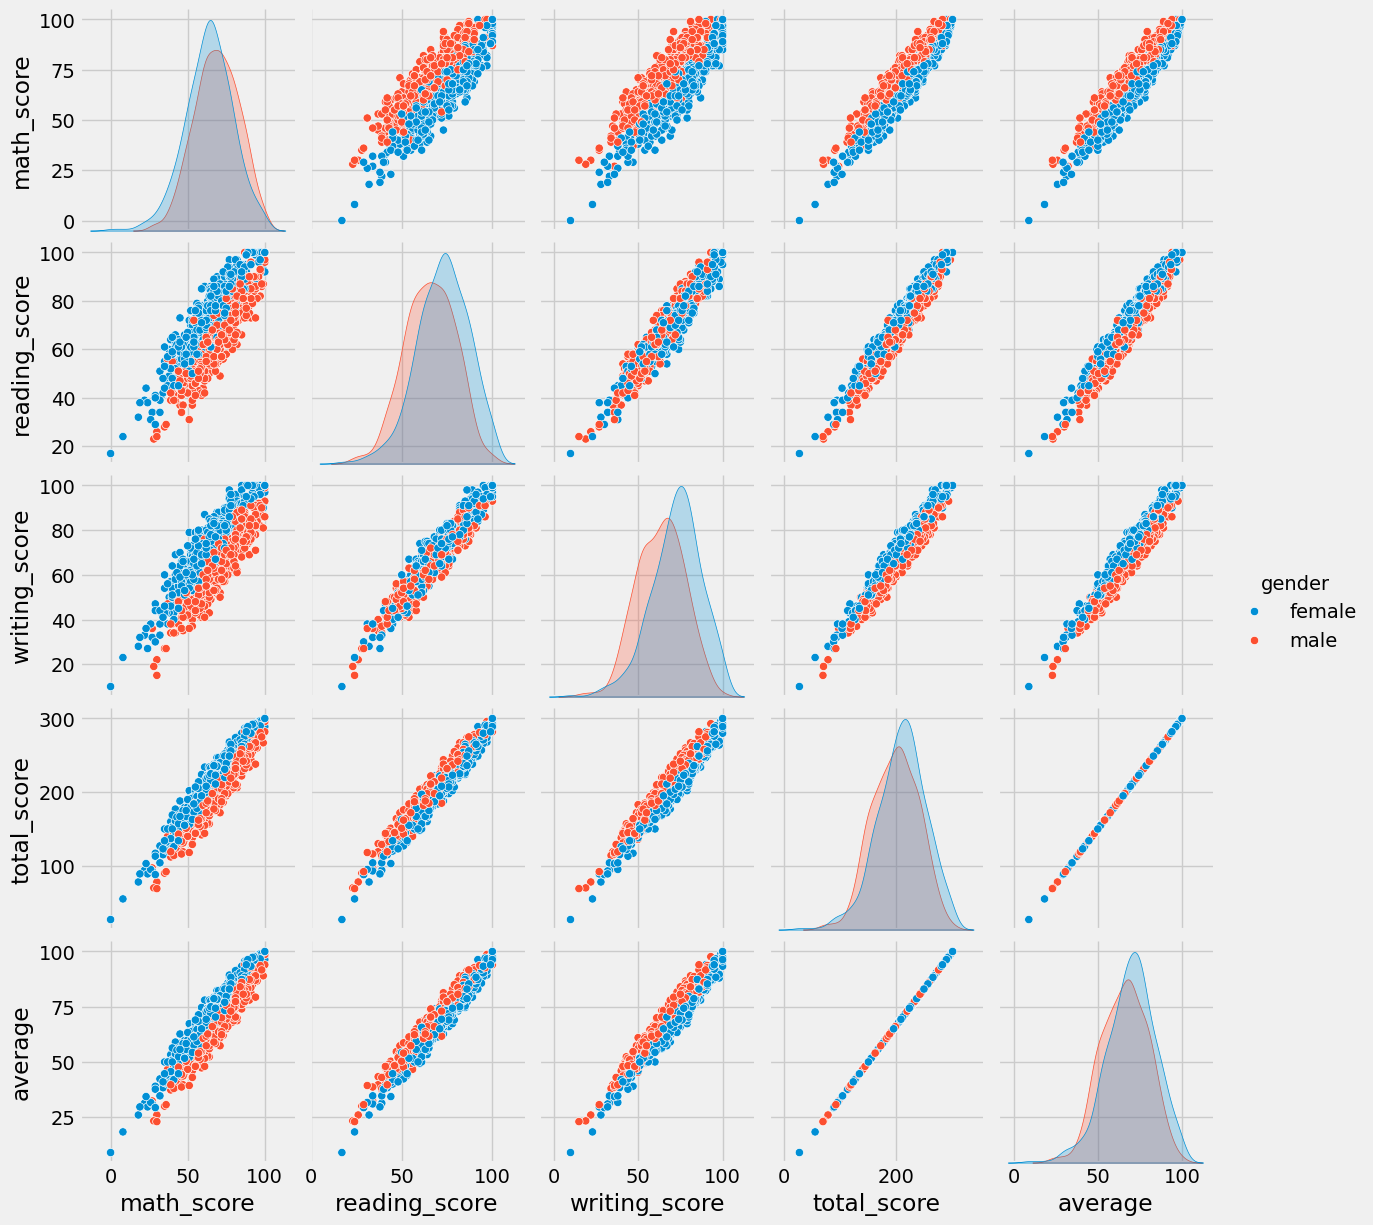

In [92]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights
From the above plot it is clear that all the scores increase linearly with each other.
5. Conclusions
Student's Performance is related with lunch, race, parental level education
Females lead in pass percentage and also are top-scorers
Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial.